In [1]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
import json
import time
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk import FreqDist
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/junggchangho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junggchangho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
'''url_list = []
api_key = "upV14PE7hG1t79Uhe5pY1o0jpWyXY9oi"
for year in range(1952, 1992):
#for year in range(1952, 1961):
    partial_url = 'https://api.nytimes.com/svc/archive/v1/'
    part_year = year
    for month in range(1, 13):
        part_month = month
        response = partial_url + str(part_year) + '/' + str(part_month) + '.json?api-key=' + api_key
        url_list.append(response)
url_list'''

'url_list = []\napi_key = "upV14PE7hG1t79Uhe5pY1o0jpWyXY9oi"\nfor year in range(1952, 1992):\n#for year in range(1952, 1961):\n    partial_url = \'https://api.nytimes.com/svc/archive/v1/\'\n    part_year = year\n    for month in range(1, 13):\n        part_month = month\n        response = partial_url + str(part_year) + \'/\' + str(part_month) + \'.json?api-key=\' + api_key\n        url_list.append(response)\nurl_list'

In [61]:
'''datas = []
for url in url_list:
    response = requests.get(url)
    unstructured_data = response.json()
    structuring_data = pd.DataFrame.from_dict(unstructured_data)
    structuring_data = structuring_data.head(1)
    datas.append(structuring_data)
datas[0]
type(datas)'''

'datas = []\nfor url in url_list:\n    response = requests.get(url)\n    unstructured_data = response.json()\n    structuring_data = pd.DataFrame.from_dict(unstructured_data)\n    structuring_data = structuring_data.head(1)\n    datas.append(structuring_data)\ndatas[0]\ntype(datas)'

In [3]:
api_key = ""
#year = []
#month = []
#url = 'https://api.nytimes.com/svc/archive/v1/1953/1.json?api-key='
url = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&being_date=19500101&end_date=19500201&page=2&api-key='
response = requests.get(url + api_key)
response.status_code

200

In [4]:
# Limit hits to every 10th because we can get only 10 hits per run
# Although delayed every 10 hits, the api only returns error after 200 hits
hits = 501
urls = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&being_date=19500101&end_date=19500201&page=2&api-key='
data_list = []
iterations = 1
for i in range(1,hits):
    if i % 10 == 0:
        time.sleep(50)
        try:
            urls = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&begin_date=19500101&end_date=19601231&page={i}&api-key='
            response = requests.get(urls + api_key)
            unstructured_data = response.json()
            print(unstructured_data['response']['meta'], "iteration:",iterations)
            test_i = pd.json_normalize(unstructured_data['response']['docs'])
            data_list.append(test_i)
            iterations += 1
        except:
            print('error',i,"iteration:",iterations)
    else:  
        try:
            urls = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&begin_date=19500101&end_date=19601231&page={i}&api-key='
            response = requests.get(urls + api_key)
            unstructured_data = response.json()
            print(unstructured_data['response']['meta'],"iteration:",iterations)
            test_i = pd.json_normalize(unstructured_data['response']['docs'])
            data_list.append(test_i)
            iterations += 1
        except:
            print('error',i,"iteration:",iterations)

{'hits': 44578, 'offset': 10, 'time': 119} iteration: 1
{'hits': 44578, 'offset': 20, 'time': 114} iteration: 2
{'hits': 44578, 'offset': 30, 'time': 108} iteration: 3
{'hits': 44578, 'offset': 40, 'time': 62} iteration: 4
{'hits': 44578, 'offset': 50, 'time': 159} iteration: 5
{'hits': 44578, 'offset': 60, 'time': 64} iteration: 6
{'hits': 44578, 'offset': 70, 'time': 33} iteration: 7
{'hits': 44578, 'offset': 80, 'time': 82} iteration: 8
{'hits': 44578, 'offset': 90, 'time': 53} iteration: 9
{'hits': 44578, 'offset': 100, 'time': 38} iteration: 10
{'hits': 44578, 'offset': 110, 'time': 73} iteration: 11
{'hits': 44578, 'offset': 120, 'time': 73} iteration: 12
{'hits': 44578, 'offset': 130, 'time': 32} iteration: 13
{'hits': 44578, 'offset': 140, 'time': 43} iteration: 14
{'hits': 44578, 'offset': 150, 'time': 36} iteration: 15
{'hits': 44578, 'offset': 160, 'time': 37} iteration: 16
{'hits': 44578, 'offset': 170, 'time': 55} iteration: 17
{'hits': 44578, 'offset': 180, 'time': 56} it

KeyboardInterrupt: 

In [6]:
time.sleep(50)
hits = 201
urls = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&being_date=19610101&end_date=19700201&page=2&api-key='
data_list2 = []
iterations = 1
for i in range(1,hits):
    if i % 10 == 0:
        time.sleep(50)
        try:
            urls = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&begin_date=19610101&end_date=19701231&page={i}&api-key='
            response = requests.get(urls + api_key)
            unstructured_data = response.json()
            print(unstructured_data['response']['meta'], "iteration:",iterations)
            test_i = pd.json_normalize(unstructured_data['response']['docs'])
            data_list2.append(test_i)
            iterations += 1
        except:
            print('error',i,"iteration:",iterations)
    else:  
        try:
            urls = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&begin_date=19610101&end_date=19701231&page={i}&api-key='
            response = requests.get(urls + api_key)
            unstructured_data = response.json()
            print(unstructured_data['response']['meta'],"iteration:",iterations)
            test_i = pd.json_normalize(unstructured_data['response']['docs'])
            data_list2.append(test_i)
            iterations += 1
        except:
            print('error',i,"iteration:",iterations)

{'hits': 10329, 'offset': 10, 'time': 55} iteration: 1
{'hits': 10329, 'offset': 20, 'time': 84} iteration: 2
{'hits': 10329, 'offset': 30, 'time': 51} iteration: 3
{'hits': 10329, 'offset': 40, 'time': 54} iteration: 4
{'hits': 10329, 'offset': 50, 'time': 54} iteration: 5
{'hits': 10329, 'offset': 60, 'time': 49} iteration: 6
{'hits': 10329, 'offset': 70, 'time': 26} iteration: 7
{'hits': 10329, 'offset': 80, 'time': 58} iteration: 8
{'hits': 10329, 'offset': 90, 'time': 39} iteration: 9
{'hits': 10329, 'offset': 100, 'time': 30} iteration: 10
{'hits': 10329, 'offset': 110, 'time': 27} iteration: 11
{'hits': 10329, 'offset': 120, 'time': 88} iteration: 12
{'hits': 10329, 'offset': 130, 'time': 27} iteration: 13
{'hits': 10329, 'offset': 140, 'time': 76} iteration: 14
error 15 iteration: 15
error 16 iteration: 15
error 17 iteration: 15
error 18 iteration: 15
error 19 iteration: 15
{'hits': 10329, 'offset': 200, 'time': 54} iteration: 15
{'hits': 10329, 'offset': 210, 'time': 24} itera

In [7]:
time.sleep(50)
hits = 201
urls = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&being_date=19710101&end_date=19800201&page=2&api-key='
data_list3 = []
iterations = 1
for i in range(1,hits):
    if i % 10 == 0:
        time.sleep(50)
        try:
            urls = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&begin_date=19710101&end_date=19801231&page={i}&api-key='
            response = requests.get(urls + api_key)
            unstructured_data = response.json()
            print(unstructured_data['response']['meta'], "iteration:",iterations)
            test_i = pd.json_normalize(unstructured_data['response']['docs'])
            data_list3.append(test_i)
            iterations += 1
        except:
            print('error',i,"iteration:",iterations)
    else:  
        try:
            urls = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&begin_date=19710101&end_date=19801231&page={i}&api-key='
            response = requests.get(urls + api_key)
            unstructured_data = response.json()
            print(unstructured_data['response']['meta'],"iteration:",iterations)
            test_i = pd.json_normalize(unstructured_data['response']['docs'])
            data_list3.append(test_i)
            iterations += 1
        except:
            print('error',i,"iteration:",iterations)

{'hits': 11048, 'offset': 10, 'time': 35} iteration: 1
{'hits': 11048, 'offset': 20, 'time': 32} iteration: 2
{'hits': 11048, 'offset': 30, 'time': 26} iteration: 3
{'hits': 11048, 'offset': 40, 'time': 47} iteration: 4
{'hits': 11048, 'offset': 50, 'time': 52} iteration: 5
{'hits': 11048, 'offset': 60, 'time': 92} iteration: 6
{'hits': 11048, 'offset': 70, 'time': 26} iteration: 7
{'hits': 11048, 'offset': 80, 'time': 50} iteration: 8
{'hits': 11048, 'offset': 90, 'time': 66} iteration: 9
{'hits': 11048, 'offset': 100, 'time': 29} iteration: 10
{'hits': 11048, 'offset': 110, 'time': 32} iteration: 11
{'hits': 11048, 'offset': 120, 'time': 36} iteration: 12
{'hits': 11048, 'offset': 130, 'time': 26} iteration: 13
{'hits': 11048, 'offset': 140, 'time': 28} iteration: 14
{'hits': 11048, 'offset': 150, 'time': 34} iteration: 15
{'hits': 11048, 'offset': 160, 'time': 27} iteration: 16
{'hits': 11048, 'offset': 170, 'time': 60} iteration: 17
{'hits': 11048, 'offset': 180, 'time': 37} iterat

In [9]:
time.sleep(50)
hits = 201
urls = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&being_date=19810101&end_date=19910201&page=2&api-key='
data_list4 = []
iterations = 1
for i in range(1,hits):
    if i % 10 == 0:
        time.sleep(50)
        try:
            urls = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&begin_date=19810101&end_date=19911226&page={i}&api-key='
            response = requests.get(urls + api_key)
            unstructured_data = response.json()
            print(unstructured_data['response']['meta'], "iteration:",iterations)
            test_i = pd.json_normalize(unstructured_data['response']['docs'])
            data_list4.append(test_i)
            iterations += 1
        except:
            print('error',i,"iteration:",iterations)
    else:  
        try:
            urls = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&begin_date=19810101&end_date=19911226&page={i}&api-key='
            response = requests.get(urls + api_key)
            unstructured_data = response.json()
            print(unstructured_data['response']['meta'],"iteration:",iterations)
            test_i = pd.json_normalize(unstructured_data['response']['docs'])
            data_list4.append(test_i)
            iterations += 1
        except:
            print('error',i,"iteration:",iterations)

{'hits': 14712, 'offset': 10, 'time': 60} iteration: 1
{'hits': 14712, 'offset': 20, 'time': 67} iteration: 2
{'hits': 14712, 'offset': 30, 'time': 53} iteration: 3
{'hits': 14712, 'offset': 40, 'time': 28} iteration: 4
{'hits': 14712, 'offset': 50, 'time': 26} iteration: 5
{'hits': 14712, 'offset': 60, 'time': 66} iteration: 6
{'hits': 14712, 'offset': 70, 'time': 79} iteration: 7
{'hits': 14712, 'offset': 80, 'time': 35} iteration: 8
{'hits': 14712, 'offset': 90, 'time': 44} iteration: 9
{'hits': 14712, 'offset': 100, 'time': 28} iteration: 10
{'hits': 14712, 'offset': 110, 'time': 28} iteration: 11
{'hits': 14712, 'offset': 120, 'time': 29} iteration: 12
{'hits': 14712, 'offset': 130, 'time': 29} iteration: 13
{'hits': 14712, 'offset': 140, 'time': 30} iteration: 14
{'hits': 14712, 'offset': 150, 'time': 33} iteration: 15
{'hits': 14712, 'offset': 160, 'time': 37} iteration: 16
{'hits': 14712, 'offset': 170, 'time': 29} iteration: 17
{'hits': 14712, 'offset': 180, 'time': 37} iterat

In [ ]:
'''hits = 41
urls = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&being_date=19500101&end_date=19500201&page=2&api-key='
iterations = 1
for i in range(1,hits):
    if i % 30 == 0:
        time.sleep(50)
        try:
            urls = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&begin_date=19500101&end_date=19601231&page={i}&api-key='
            response = requests.get(urls + api_key)
            unstructured_data = response.json()
            print(unstructured_data['response']['meta'], "iteration:",iterations)
            test_i = pd.json_normalize(unstructured_data['response']['docs'])
            data_list.append(test_i)
            iterations += 1
        except:
            print('error',i,"iteration:",iterations)
    else:
        if i % 10 == 0:
            time.sleep(40)
            try:
                urls = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&begin_date=19500101&end_date=19601231&page={i}&api-key='
                response = requests.get(urls + api_key)
                unstructured_data = response.json()
                print(unstructured_data['response']['meta'], "iteration:",iterations)
                test_i = pd.json_normalize(unstructured_data['response']['docs'])
                data_list.append(test_i)
                iterations += 1
            except:
                print('error',i,"iteration:",iterations)
        else:  
            try:
                urls = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&begin_date=19500101&end_date=19601231&page={i}&api-key='
                response = requests.get(urls + api_key)
                unstructured_data = response.json()
                print(unstructured_data['response']['meta'],"iteration:",iterations)
                test_i = pd.json_normalize(unstructured_data['response']['docs'])
                data_list.append(test_i)
                iterations += 1
            except:
                print('error',i,"iteration:",iterations)'''

'hits = 41\nurls = \'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&being_date=19500101&end_date=19500201&page=2&api-key=\'\niterations = 1\nfor i in range(1,hits):\n    if i % 30 == 0:\n        time.sleep(50)\n        try:\n            urls = f\'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=korea&facet_fields=source&facet=true&begin_date=19500101&end_date=19601231&page={i}&api-key=\'\n            response = requests.get(urls + api_key)\n            unstructured_data = response.json()\n            print(unstructured_data[\'response\'][\'meta\'], "iteration:",iterations)\n            test_i = pd.json_normalize(unstructured_data[\'response\'][\'docs\'])\n            data_list.append(test_i)\n            iterations += 1\n        except:\n            print(\'error\',i,"iteration:",iterations)\n    else:\n        if i % 10 == 0:\n            time.sleep(40)\n            try:\n                urls = f\'https://api.nytimes.com/svc/s

In [10]:
testing_1 = pd.concat(data_list)
testing_1

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,keywords,pub_date,...,headline.main,headline.kicker,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization
0,"1,534 retired from Army under Govt plan to dro...",https://www.nytimes.com/1960/12/28/archives/se...,"1,534 retired from Army under Govt plan to dro...",,food fashions family furnishings,31,The New York Times,[],"[{'name': 'subject', 'value': 'Korean War', 'r...",1960-12-28T05:00:00+0000,...,"Seoul Cuts 1,534 From Army",None,None,"Seoul Cuts 1,534 From Army",None,None,None,None,[],None
1,"US as 'main aggressive force' assailed, Moscow...",https://www.nytimes.com/1960/12/08/archives/so...,"US as 'main aggressive force' assailed, Moscow...",,NaN,1,The New York Times,[],"[{'name': 'glocations', 'value': 'KOREA', 'ran...",1960-12-08T05:00:00+0000,...,Soviet Bids U.N. Compel U.S. Troops to Quit Ko...,None,None,Soviet Bids U.N. Compel U.S. Troops to Quit Ko...,None,None,None,Special to The New York Times,"[{'firstname': None, 'middlename': None, 'last...",None
2,Pres Chang repts Govt will seek aid from W Ger...,https://www.nytimes.com/1960/12/23/archives/se...,Pres Chang repts Govt will seek aid from W Ger...,,NaN,3,The New York Times,[],"[{'name': 'glocations', 'value': 'KOREA', 'ran...",1960-12-23T05:00:00+0000,...,SEOUL TO SEEK MORE AID; Plans Moves Aimed to R...,None,None,SEOUL TO SEEK MORE AID; Plans Moves Aimed to R...,None,None,None,None,[],None
3,Truman declines further comment; says 'history...,https://www.nytimes.com/1960/12/25/archives/tr...,Truman declines further comment; says 'history...,,NaN,29,The New York Times,[],"[{'name': 'persons', 'value': 'TRUMAN, HARRY S...",1960-12-25T05:00:00+0000,...,"TRUMAN TAKES AIR, AND AIRS HIS VIEWS",None,None,"TRUMAN TAKES AIR, AND AIRS HIS VIEWS",None,None,None,None,[],None
4,Truman declines further comment; says 'history...,https://www.nytimes.com/1960/12/24/archives/tr...,Truman declines further comment; says 'history...,,NaN,2,The New York Times,[],"[{'name': 'subject', 'value': 'Korean War', 'r...",1960-12-24T05:00:00+0000,...,TRUMAN CALLS HALT TO M'ARTHUR DEBATE,None,None,TRUMAN CALLS HALT TO M'ARTHUR DEBATE,None,None,None,None,[],None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,"Korea Wk observed, Guatemala",https://www.nytimes.com/1952/06/30/archives/gu...,"Korea Wk observed, Guatemala",,NaN,4,The New York Times,[],"[{'name': 'subject', 'value': 'Korean War', 'r...",1952-06-30T05:00:00+0000,...,Guatemalans Hail Korean Reds,None,None,Guatemalans Hail Korean Reds,None,None,None,Special to THE NEW YORK TIMES,"[{'firstname': None, 'middlename': None, 'last...",None
6,,https://www.nytimes.com/1952/02/24/archives/ne...,,,NaN,3,The New York Times,[],"[{'name': 'subject', 'value': 'Korean War', 'r...",1952-02-24T05:00:00+0000,...,NEW JET ACE IN KOREA,None,None,NEW JET ACE IN KOREA,None,None,None,None,[],None
7,"incidence, SK",https://www.nytimes.com/1958/09/04/archives/ko...,"incidence, SK",,NaN,31,The New York Times,[],"[{'name': 'subject', 'value': 'Encephalitis', ...",1958-09-04T05:00:00+0000,...,Korea Encephalitis Toll Up,None,None,Korea Encephalitis Toll Up,None,None,None,None,[],None
8,Knowland and Korea Affairs Inst back Acheson n...,https://www.nytimes.com/1950/04/11/archives/ko...,Knowland and Korea Affairs Inst back Acheson n...,,NaN,9,The New York Times,[],"[{'name': 'glocations', 'value': 'KOREA, REPUB...",1950-04-11T05:00:00+0000,...,Korea Studies Tax Measures,None,None,Korea Studies Tax Measures,None,None,None,None,[],None


In [11]:
data1 = pd.concat(data_list)
data2 = pd.concat(data_list2)
data3 = pd.concat(data_list3)
data4 = pd.concat(data_list4)
#data1.to_csv('NYT_API_1.csv',index=False)
#data2.to_csv('NYT_API_2.csv',index=False)
#data3.to_csv('NYT_API_3.csv',index=False)
#data4.to_csv('NYT_API_4.csv',index=False)

In [ ]:
unstructured_data = response.json()
print(unstructured_data.keys())
#print(uncleaned_data)
#uncleaned_data

dict_keys(['status', 'copyright', 'response'])


In [2]:
saved_data1 = pd.read_csv('NYT_API_1.csv')
saved_data2 = pd.read_csv('NYT_API_2.csv')
saved_data3 = pd.read_csv('NYT_API_3.csv')
saved_data4 = pd.read_csv('NYT_API_4.csv')
saved_data1['year'] = saved_data1['pub_date'].str.split('-').str[0]
saved_data2['year'] = saved_data2['pub_date'].str.split('-').str[0]
saved_data3['year'] = saved_data3['pub_date'].str.split('-').str[0]
saved_data4['year'] = saved_data4['pub_date'].str.split('-').str[0]
data_by_year1 = saved_data1.groupby("year").count().reset_index()
data_by_year2 = saved_data2.groupby("year").count().reset_index()
data_by_year3 = saved_data3.groupby("year").count().reset_index()
data_by_year4 = saved_data4.groupby("year").count().reset_index()

In [3]:
data_by_year1

,year,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,keywords,...,headline.main,headline.kicker,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization
0,1950,168,202,109,0,16,202,202,202,202,...,202,74,0,202,0,0,0,32,202,2
1,1951,207,300,149,0,22,300,300,300,300,...,300,128,0,300,0,0,0,27,300,4
2,1952,116,472,78,0,29,472,472,472,472,...,472,377,0,472,0,0,0,22,472,0
3,1953,157,396,122,0,34,396,396,396,396,...,396,264,0,396,0,0,0,20,396,1
4,1954,71,86,52,0,8,86,86,86,86,...,86,23,0,86,0,0,0,15,86,0
5,1955,34,39,25,0,3,39,39,39,39,...,39,11,0,39,0,0,0,13,39,0
6,1956,27,33,19,0,7,33,33,33,33,...,33,8,0,33,0,0,0,3,33,0
7,1957,20,25,11,0,4,25,25,25,25,...,25,11,0,25,0,0,0,5,25,0
8,1958,23,28,13,0,3,28,28,28,28,...,28,13,0,28,0,0,0,6,28,0
9,1959,19,20,14,0,0,20,20,20,20,...,20,4,0,20,0,0,0,6,20,1


In [4]:
data_by_year2

,year,abstract,web_url,snippet,lead_paragraph,print_page,source,multimedia,keywords,pub_date,...,headline.kicker,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization,print_section
0,1961,182,201,171,0,201,201,201,201,201,...,27,0,201,0,0,0,104,201,2,22
1,1962,148,184,135,0,184,184,184,184,184,...,41,0,184,0,0,0,40,184,2,18
2,1963,85,177,42,0,177,177,177,177,177,...,126,0,177,0,0,0,64,177,2,23
3,1964,168,168,125,168,167,168,168,168,168,...,0,0,167,0,0,0,1,168,0,8
4,1965,144,174,135,0,174,174,174,174,174,...,36,0,174,0,0,0,95,174,0,33
5,1966,108,125,98,0,125,125,125,125,125,...,26,0,125,0,0,0,23,125,1,23
6,1967,147,158,135,0,158,158,158,158,158,...,20,0,158,0,0,0,26,158,1,20
7,1968,204,225,187,0,225,225,225,225,225,...,34,0,225,0,0,0,108,225,0,18
8,1969,150,161,143,0,161,161,161,161,161,...,18,0,161,0,0,0,84,161,0,9
9,1970,177,177,166,176,177,177,177,177,177,...,0,0,177,0,0,0,55,177,0,2


In [5]:
data_by_year3

,year,abstract,web_url,snippet,lead_paragraph,print_page,source,multimedia,keywords,pub_date,...,headline.kicker,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization,print_section
0,1971,144,144,125,143,144,144,144,144,144,...,0,0,144,0,0,0,29,144,0,2
1,1972,172,172,160,170,172,172,172,172,172,...,0,0,172,0,0,0,47,172,0,7
2,1973,154,154,140,154,154,154,154,154,154,...,0,0,154,0,0,0,33,154,0,0
3,1974,125,125,115,123,124,125,125,125,125,...,0,0,125,0,0,0,49,125,0,0
4,1975,125,125,110,122,125,125,125,125,125,...,0,0,125,0,0,0,47,125,0,5
5,1976,176,176,157,156,176,176,176,176,176,...,0,0,176,0,0,0,89,176,0,3
6,1977,263,263,218,259,263,263,263,263,263,...,0,0,263,0,0,0,156,263,0,22
7,1978,118,118,108,118,118,118,118,118,118,...,0,0,118,0,0,0,60,118,3,62
8,1979,168,168,154,168,168,168,168,168,168,...,0,0,168,0,0,0,70,168,0,109
9,1980,319,435,0,0,435,435,435,435,435,...,435,0,435,0,0,0,261,435,0,333


In [6]:
data_by_year4

,year,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,keywords,...,headline.kicker,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization,subsection_name
0,1981,101,101,3,101,101,101,101,101,101,...,16,0,101,0,0,0,82,101,30,0
1,1982,105,105,4,105,105,105,105,105,105,...,18,0,105,0,0,0,88,105,35,0
2,1983,161,163,1,161,161,161,161,163,163,...,40,0,161,2,0,0,130,163,57,0
3,1984,155,155,3,155,155,155,155,155,155,...,31,0,155,0,0,0,126,155,64,2
4,1985,142,142,5,142,142,142,142,142,142,...,33,0,142,0,0,0,117,142,36,2
5,1986,154,154,4,154,154,154,154,154,154,...,42,0,154,0,0,0,134,154,43,0
6,1987,273,274,6,273,272,272,273,274,274,...,29,0,273,1,0,0,236,274,61,0
7,1988,240,240,4,240,240,240,240,240,240,...,21,0,240,0,0,0,210,240,80,0
8,1989,121,121,3,121,121,121,121,121,121,...,8,0,121,0,0,0,113,121,48,1
9,1990,174,174,6,174,174,174,174,174,174,...,17,0,174,0,0,0,149,174,59,2


In [7]:
saved_data1.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,keywords,pub_date,...,headline.kicker,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization,year
0,"1,534 retired from Army under Govt plan to dro...",https://www.nytimes.com/1960/12/28/archives/se...,"1,534 retired from Army under Govt plan to dro...",NaN,food fashions family furnishings,31,The New York Times,[],"[{'name': 'subject', 'value': 'Korean War', 'r...",1960-12-28T05:00:00+0000,...,NaN,NaN,"Seoul Cuts 1,534 From Army",NaN,NaN,NaN,NaN,[],NaN,1960
1,"US as 'main aggressive force' assailed, Moscow...",https://www.nytimes.com/1960/12/08/archives/so...,"US as 'main aggressive force' assailed, Moscow...",NaN,NaN,1,The New York Times,[],"[{'name': 'glocations', 'value': 'KOREA', 'ran...",1960-12-08T05:00:00+0000,...,NaN,NaN,Soviet Bids U.N. Compel U.S. Troops to Quit Ko...,NaN,NaN,NaN,Special to The New York Times,"[{'firstname': None, 'middlename': None, 'last...",NaN,1960
2,Pres Chang repts Govt will seek aid from W Ger...,https://www.nytimes.com/1960/12/23/archives/se...,Pres Chang repts Govt will seek aid from W Ger...,NaN,NaN,3,The New York Times,[],"[{'name': 'glocations', 'value': 'KOREA', 'ran...",1960-12-23T05:00:00+0000,...,NaN,NaN,SEOUL TO SEEK MORE AID; Plans Moves Aimed to R...,NaN,NaN,NaN,NaN,[],NaN,1960
3,Truman declines further comment; says 'history...,https://www.nytimes.com/1960/12/25/archives/tr...,Truman declines further comment; says 'history...,NaN,NaN,29,The New York Times,[],"[{'name': 'persons', 'value': 'TRUMAN, HARRY S...",1960-12-25T05:00:00+0000,...,NaN,NaN,"TRUMAN TAKES AIR, AND AIRS HIS VIEWS",NaN,NaN,NaN,NaN,[],NaN,1960
4,Truman declines further comment; says 'history...,https://www.nytimes.com/1960/12/24/archives/tr...,Truman declines further comment; says 'history...,NaN,NaN,2,The New York Times,[],"[{'name': 'subject', 'value': 'Korean War', 'r...",1960-12-24T05:00:00+0000,...,NaN,NaN,TRUMAN CALLS HALT TO M'ARTHUR DEBATE,NaN,NaN,NaN,NaN,[],NaN,1960


In [8]:
saved_data1['texts'] = saved_data1['abstract'].astype(str) + ' ' + saved_data1['snippet'].astype(str) + ' ' + saved_data1['lead_paragraph'].astype(str) + ' ' + saved_data1['headline.print_headline'].astype(str)
saved_data1['texts'][0]

'1,534 retired from Army under Govt plan to drop 30,000 1,534 retired from Army under Govt plan to drop 30,000 nan Seoul Cuts 1,534 From Army'

In [9]:
saved_data1['texts'] = [texts.lower() for texts in saved_data1['texts']]
saved_data1['texts'] = saved_data1['texts'].apply(nltk.word_tokenize)

#saved_data1['filtered_texts'] = [texts.lower() for texts in saved_data1['texts'] if texts not in stop_words]
saved_data1['filtered_texts'] = saved_data1['texts'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
saved_data1['filtered_texts']

0       1,534 retired army govt plan drop 30,000 1,534...
1       us 'main aggressive force ' assailed , moscow ...
2       pres chang repts govt seek aid w ger japan les...
3       truman declines comment ; says 'history take c...
4       truman declines comment ; says 'history take c...
                              ...                        
1795    korea wk observed , guatemala korea wk observe...
1796                        nan nan nan new jet ace korea
1797    incidence , sk incidence , sk nan korea enceph...
1798    knowland korea affairs inst back acheson note ...
1799    leave korea dec 16 leave korea dec 16 nan siem...
Name: filtered_texts, Length: 1800, dtype: object

In [10]:
def stem_words(row):
    stemmed_words = ''
    for token in row.filtered_texts.split(' '):
        stemmed_words += porter.stem(token) + ' '
    return stemmed_words
saved_data1['stemmed_text'] = saved_data1.apply(stem_words, axis=1)

In [11]:
saved_data2.head()

,abstract,web_url,snippet,lead_paragraph,print_page,source,multimedia,keywords,pub_date,document_type,...,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization,print_section,year
0,current reduction in US forces provokes seriou...,https://www.nytimes.com/1970/11/29/archives/ko...,current reduction in US forces provokes seriou...,"SEOUL, South Korea, Nov. 24—The current reduct...",109.0,The New York Times,[],"[{'name': 'subject', 'value': 'Korean War', 'r...",1970-11-29T05:00:00+0000,article,...,NaN,KOREANS DUBIOUS ON INTENT OF U.S.,NaN,NaN,NaN,NaN,[],NaN,NaN,1970
1,"HR Appropriations Com, with Adm support, maneu...",https://www.nytimes.com/1970/12/10/archives/ho...,"HR Appropriations Com, with Adm support, maneu...","WASHINGTON, Dec. 9 — With Administration suppo...",1.0,The New York Times,[],"[{'name': 'glocations', 'value': 'Vietnam', 'r...",1970-12-10T05:00:00+0000,article,...,NaN,HOUSE GROUP ACTS TO WIN APPROVAL OF CAMBODIA AID,NaN,NaN,NaN,By John W. Finney; Special to The New York Times,"[{'firstname': 'John', 'middlename': 'W.', 'la...",NaN,NaN,1970
2,N and S Korean troops fight 9-hr series of gun...,https://www.nytimes.com/1970/12/06/archives/no...,N and S Korean troops fight 9-hr series of gun...,"PANMUNJOM, Korea, Dec. —North Korea repeatedly...",26.0,The New York Times,[],"[{'name': 'glocations', 'value': 'KOREA', 'ran...",1970-12-06T05:00:00+0000,article,...,NaN,NORTHKOREA ASKS RETURN OF PILOT,NaN,NaN,NaN,NaN,[],NaN,NaN,1970
3,Communist China quietly drops its long-standin...,https://www.nytimes.com/1970/11/23/archives/pe...,Communist China quietly drops its long-standin...,"HONG KONG, Nov. 22— Peking has quietly dropped...",5.0,The New York Times,[],"[{'name': 'glocations', 'value': 'KOREA', 'ran...",1970-11-23T05:00:00+0000,article,...,NaN,Peking Drops Claim to Korean Area,NaN,NaN,NaN,NaN,[],NaN,NaN,1970
4,"S Korea repts N Korean Air Force pilot, flying...",https://www.nytimes.com/1970/12/03/archives/se...,"S Korea repts N Korean Air Force pilot, flying...","SEOUL, South Korea, Thurs day, Dec. 3, (Reuter...",12.0,The New York Times,[],"[{'name': 'glocations', 'value': 'KOREA', 'ran...",1970-12-03T05:00:00+0000,article,...,NaN,Seoul Reports a Defection,NaN,NaN,NaN,NaN,[],NaN,NaN,1970


In [12]:
saved_data2['texts'] = saved_data2['abstract'].astype(str) + ' ' + saved_data2['snippet'].astype(str) + ' ' + saved_data2['lead_paragraph'].astype(str) + ' ' + saved_data2['headline.print_headline'].astype(str)
saved_data2['texts'][0]

'current reduction in US forces provokes serious doubts among S Koreans over US readiness to come to its aid; Korean and US officials speak openly of major differences of view; Premier Chung Il Kwon declines comment; S Korean Joint C/S chmn Gen Shim Heung Sun and other Korean officials hold reduction in forces has been badly timed and not accompanied by proper assurances that US will fill breach; US officials hold view that S Koreans exaggerate threat from N Korea current reduction in US forces provokes serious doubts among S Koreans over US readiness to come to its aid; Korean and US officials speak openly of major differences of view; Premier Chung Il Kwon declines comment; S Korean Joint C/S chmn Gen Shi... SEOUL, South Korea, Nov. 24—The current reduction of United States forces in South Korea has provoked serious doubts over American readi ness to come promptly to the defense of this country and leading Korean and United States officials speak openly of significant differences of 

In [13]:
saved_data2['texts'] = [texts.lower() for texts in saved_data2['texts']]
saved_data2['texts'] = saved_data2['texts'].apply(nltk.word_tokenize)
saved_data2['filtered_texts'] = saved_data2['texts'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
saved_data2['filtered_texts']

0       current reduction us forces provokes serious d...
1       hr appropriations com , adm support , maneuver...
2       n korean troops fight 9-hr series gun battles ...
3       communist china quietly drops long-standing cl...
4       korea repts n korean air force pilot , flying ...
                              ...                        
1745    h e salisbury ussr efforts tighten relations g...
1746    article poverty nation links overpopulation in...
1747    us spend $ 7.1-million supply special 'kimchi ...
1748    pres yun holds unification must postponed sk s...
1749    rev n mailer book support kennedy rejection re...
Name: filtered_texts, Length: 1750, dtype: object

In [14]:
saved_data2['stemmed_text'] = saved_data2.apply(stem_words, axis=1)

In [15]:
saved_data3.head()

,abstract,web_url,snippet,lead_paragraph,print_page,source,multimedia,keywords,pub_date,document_type,...,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization,print_section,year
0,"Sup Ct upholds sentences of 18 dissidents, inc...",https://www.nytimes.com/1977/03/22/archives/ko...,"Sup Ct upholds sentences of 18 dissidents, inc...","SEOUL, South Korea, Tuesday, March 22 (Reuters...",2.0,The New York Times,[],"[{'name': 'glocations', 'value': 'South Korea'...",1977-03-22T05:00:00+0000,article,...,NaN,Korea Dissidents’,NaN,NaN,NaN,NaN,[],NaN,NaN,1977
1,ed on current re-exam of tripartite relationsh...,https://www.nytimes.com/1975/09/20/archives/th...,ed on current re-exam of tripartite relationsh...,The shifting tripartite relationship among the...,28.0,The New York Times,[],"[{'name': 'glocations', 'value': 'South Korea'...",1975-09-20T05:00:00+0000,article,...,NaN,The Korean Triangle,NaN,NaN,NaN,NaN,[],NaN,NaN,1975
2,ed scoring recent pol arrests by S Korean Pres...,https://www.nytimes.com/1976/03/12/archives/ko...,ed scoring recent pol arrests by S Korean Pres...,"“We're much better than Spain,” said a senior ...",31.0,The New York Times,[],"[{'name': 'glocations', 'value': 'South Korea'...",1976-03-12T05:00:00+0000,article,...,NaN,Korean ‘Democracy’,NaN,NaN,NaN,NaN,[],NaN,NaN,1976
3,ed commenting on slow pace of N and S Korean r...,https://www.nytimes.com/1972/12/05/archives/ta...,ed commenting on slow pace of N and S Korean r...,The slow pace of negotiations between the regi...,46.0,The New York Times,[],"[{'name': 'glocations', 'value': 'KOREA', 'ran...",1972-12-05T05:00:00+0000,article,...,NaN,Talking in Korea,NaN,NaN,NaN,NaN,[],NaN,NaN,1972
4,ed holds S Korea has moved wisely to accept id...,https://www.nytimes.com/1973/07/07/archives/th...,ed holds S Korea has moved wisely to accept id...,The Government of South Korea has moved wisely...,20.0,The New York Times,[],"[{'name': 'glocations', 'value': 'KOREA', 'ran...",1973-07-07T05:00:00+0000,article,...,NaN,The Two Koreas,NaN,NaN,NaN,NaN,[],NaN,NaN,1973


In [16]:
saved_data3['texts'] = saved_data3['abstract'].astype(str) + ' ' + saved_data3['snippet'].astype(str) + ' ' + saved_data3['lead_paragraph'].astype(str) + ' ' + saved_data3['headline.print_headline'].astype(str)
saved_data3['texts'][0]

"Sup Ct upholds sentences of 18 dissidents, including former Pres Yun Po Sun and opposition Pres canidate Kim Dae Jung, for violating presidential emergency decree in Mar '76 (M) Sup Ct upholds sentences of 18 dissidents, including former Pres Yun Po Sun and opposition Pres canidate Kim Dae Jung, for violating presidential emergency decree in Mar '76 (M) SEOUL, South Korea, Tuesday, March 22 (Reuters)—The South Korean Supreme Court today upheld sentences of five years in prison imposed on former President Yun Po Sun and on Kim Dae Jung, the opposition presidential candidate in 1971, under a presidential emergency decree. Korea Dissidents’"

In [17]:
saved_data3['texts'] = [texts.lower() for texts in saved_data3['texts']]
saved_data3['texts'] = saved_data3['texts'].apply(nltk.word_tokenize)
saved_data3['filtered_texts'] = saved_data3['texts'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
saved_data3['filtered_texts']

0       sup ct upholds sentences 18 dissidents , inclu...
1       ed current re-exam tripartite relationship us ...
2       ed scoring recent pol arrests korean pres park...
3       ed commenting slow pace n korean reunification...
4       ed holds korea moved wisely accept idea korean...
                              ...                        
1875    japanese leftist opposition parties parliament...
1876    korea pres park chung hee , int , says new def...
1877    10,000 demonstrators converge japanese embassy...
1878    analysis meetings , panmunjom , n korean red c...
1879    seoul , south korea , nov. 3 & # 8212 ; south ...
Name: filtered_texts, Length: 1880, dtype: object

In [18]:
saved_data3['stemmed_text'] = saved_data3.apply(stem_words, axis=1)

In [19]:
saved_data4.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,keywords,pub_date,...,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization,subsection_name,year
0,The Supreme Court today let stand an appeals...,https://www.nytimes.com/1991/12/03/us/korean-a...,NaN,The Supreme Court today let stand an appeals c...,B,10.0,The New York Times,[],"[{'name': 'glocations', 'value': 'UNION OF SOV...",1991-12-03T05:00:00+0000,...,NaN,Korean Air Disaster Ruling Stands,NaN,NaN,NaN,Reuters,[],Reuters,NaN,1991
1,For more than a decade American intelligence...,https://www.nytimes.com/1991/12/01/weekinrevie...,NaN,For more than a decade American intelligence e...,4,4.0,The New York Times,[],"[{'name': 'glocations', 'value': 'North Korea'...",1991-12-01T05:00:00+0000,...,NaN,THE WORLD; Delay on North Korea Leaves Nasty C...,NaN,NaN,NaN,By David E. Sanger,"[{'firstname': 'David', 'middlename': 'E.', 'l...",NaN,NaN,1991
2,Revolutionary slogans are strung across drab...,https://www.nytimes.com/1991/12/23/world/no-he...,NaN,Revolutionary slogans are strung across drab o...,A,1.0,The New York Times,[],"[{'name': 'glocations', 'value': 'North Korea'...",1991-12-23T05:00:00+0000,...,NaN,No Headline,NaN,NaN,NaN,By Steven R. Weisman,"[{'firstname': 'Steven', 'middlename': 'R.', '...",NaN,NaN,1991
3,The disintegration of the Soviet Union has r...,https://www.nytimes.com/1991/12/22/opinion/for...,NaN,The disintegration of the Soviet Union has rai...,4,10.0,The New York Times,[],"[{'name': 'glocations', 'value': 'Iraq', 'rank...",1991-12-22T05:00:00+0000,...,NaN,Forget Dr. No,NaN,NaN,NaN,NaN,[],NaN,NaN,1991
4,In a move intended to increase pressure on N...,https://www.nytimes.com/1991/12/19/world/seoul...,NaN,In a move intended to increase pressure on Nor...,A,3.0,The New York Times,[],"[{'name': 'glocations', 'value': 'South Korea'...",1991-12-19T05:00:00+0000,...,NaN,Seoul Says It Now Has No Nuclear Arms,NaN,NaN,NaN,By James Sterngold,"[{'firstname': 'James', 'middlename': None, 'l...",NaN,NaN,1991


In [20]:
saved_data4['texts'] = saved_data4['abstract'].astype(str) + ' ' + saved_data4['snippet'].astype(str) + ' ' + saved_data4['lead_paragraph'].astype(str) + saved_data4['headline.print_headline'].astype(str)
saved_data4['texts'][0]

'  The Supreme Court today let stand an appeals court ruling that threw out an award of $50 million in punitive damages against Korean Air Lines over the 1983 Soviet downing of an airliner that killed 269 people.   But in upholding a companion appellate ruling that the KAL crew was guilty of misconduct, the Justices allowed survivors of the victims to sue the airline for compensatory damages beyond the $75,000 allowed in an international treaty on air travel. nan The Supreme Court today let stand an appeals court ruling that threw out an award of $50 million in punitive damages against Korean Air Lines over the 1983 Soviet downing of an airliner that killed 269 people.Korean Air Disaster Ruling Stands'

In [21]:
saved_data4['texts'] = [texts.lower() for texts in saved_data4['texts']]
saved_data4['texts'] = saved_data4['texts'].apply(nltk.word_tokenize)
saved_data4['filtered_texts'] = saved_data4['texts'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
saved_data4['filtered_texts']

0       supreme court today let stand appeals court ru...
1       decade american intelligence experts scrutiniz...
2       revolutionary slogans strung across drab offic...
3       disintegration soviet union raised fears hundr...
4       move intended increase pressure north korea ha...
                              ...                        
1795    lead : international olympic committee would c...
1796    chinese air force colonel flew mig-21 south ko...
1797    lead : violent clashes erupted sporadically do...
1798    state department issued historical volume toda...
1799    vice president bush , highest official reagan ...
Name: filtered_texts, Length: 1800, dtype: object

In [22]:
saved_data4['stemmed_text'] = saved_data4.apply(stem_words, axis=1)

In [23]:
vectorizer = TfidfVectorizer(max_df=.7, min_df=1, stop_words=stop_words)
documents1 = saved_data1.stemmed_text.tolist()
documents2 = saved_data2.stemmed_text.tolist()
documents3 = saved_data3.stemmed_text.tolist()
documents4 = saved_data4.stemmed_text.tolist()

In [24]:
transformed_documents1 = vectorizer.fit_transform(documents1)
transformed_documents_as_array1 = transformed_documents1.toarray()
year = saved_data1.year.tolist()
tfidf_results1 = []
for counter, doc in enumerate(transformed_documents_as_array1):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df1 = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df1['dates'] = year[counter]
    tfidf_results1.append(one_doc_as_df1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
transformed_documents2 = vectorizer.fit_transform(documents2)
transformed_documents_as_array2 = transformed_documents2.toarray()
year = saved_data2.year.tolist()
tfidf_results2 = []
for counter, doc in enumerate(transformed_documents_as_array2):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df2 = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df2['dates'] = year[counter]
    tfidf_results2.append(one_doc_as_df2)

In [26]:
transformed_documents3 = vectorizer.fit_transform(documents3)
transformed_documents_as_array3 = transformed_documents3.toarray()
year = saved_data3.year.tolist()
tfidf_results3 = []
for counter, doc in enumerate(transformed_documents_as_array3):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df3 = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df3['dates'] = year[counter]
    tfidf_results3.append(one_doc_as_df3)

In [27]:
transformed_documents4 = vectorizer.fit_transform(documents4)
transformed_documents_as_array4 = transformed_documents4.toarray()
year = saved_data4.year.tolist()
tfidf_results4 = []
for counter, doc in enumerate(transformed_documents_as_array4):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df4 = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df4['dates'] = year[counter]
    tfidf_results4.append(one_doc_as_df4)

In [28]:
tfidf_df1 = pd.concat(tfidf_results1)
tfidf_df1 = tfidf_df1.sort_values(by=['score'], ascending=False)
tfidf_df1.head(20)

,term,score,dates
0,korea,1.000000,1953
0,devalu,0.997935,1950
0,moscow,0.989141,1959
0,lull,0.985043,1952
0,lull,0.985043,1953
0,dictionari,0.981862,1956
0,vigil,0.979880,1952
0,symbol,0.978273,1952
0,treati,0.976891,1954
0,friend,0.976891,1951


In [29]:
tfidf_df2 = pd.concat(tfidf_results2)
tfidf_df2 = tfidf_df2.sort_values(by=['score'], ascending=False)
tfidf_df2.head(20)

,term,score,dates
0,korea,1.000000,1963
0,pittsburgh,0.983013,1965
0,train,0.969547,1968
0,lead,0.966308,1969
0,vote,0.960209,1963
0,kill,0.960003,1968
0,wound,0.955305,1967
0,stun,0.948111,1968
0,lemnitz,0.947774,1962
0,lodg,0.945883,1965


In [30]:
tfidf_df3 = pd.concat(tfidf_results3)
tfidf_df3 = tfidf_df3.sort_values(by=['score'], ascending=False)
tfidf_df3.head(20)

,term,score,dates
0,nan,0.813315,1980
0,nan,0.803068,1980
0,nan,0.803068,1980
0,broadway,0.738891,1980
0,silk,0.726957,1976
0,finland,0.724077,1973
0,nan,0.695208,1980
0,truman,0.689941,1972
0,limb,0.684167,1976
0,jamaica,0.680884,1980


In [31]:
tfidf_df4 = pd.concat(tfidf_results4)
tfidf_df4 = tfidf_df4.sort_values(by=['score'], ascending=False)
tfidf_df4.head(20)

,term,score,dates
0,nannan,1.000000,1983
0,nannan,1.000000,1983
0,nannan,1.000000,1987
0,editor,0.763032,1988
0,steel,0.734213,1985
0,editor,0.733807,1987
0,editor,0.724487,1987
0,bank,0.721040,1984
0,sport,0.720294,1987
0,editor,0.719449,1987


In [ ]:
'''test_1 = pd.json_normalize(unstructured_data['response']['docs'])
unstructured_data['response']['meta']'''

{'hits': 8081, 'offset': 100, 'time': 30}

In [ ]:
#test_1[20:21].to_dict()
#test_1

In [ ]:
'''#uncleaned_data['response']['docs']
structuring_data = pd.DataFrame.from_dict(unstructured_data['response'])
structuring_data = structuring_data.head(1)
structuring_data'''

"#uncleaned_data['response']['docs']\nstructuring_data = pd.DataFrame.from_dict(unstructured_data['response'])\nstructuring_data = structuring_data.head(1)\nstructuring_data"

In [ ]:
#structuring_data['response'].values[0]

In [ ]:
#cleaning_data['title'] = cleaning_data['response'].str.split('-').str[0]
#cleaning_data['korea'] = cleaning_data['response'].str.count('KOREA')
'''structuring_data['response'] = structuring_data['response'].astype(str)
structuring_data['korea'] = structuring_data['response'].str.count('korea') + structuring_data['response'].str.count('korean') + structuring_data['response'].str.count('koreans') + structuring_data['response'].str.count('KOREA') + structuring_data['response'].str.count('KOREAN') + structuring_data['response'].str.count('KOREANS')
structuring_data'''

"structuring_data['response'] = structuring_data['response'].astype(str)\nstructuring_data['korea'] = structuring_data['response'].str.count('korea') + structuring_data['response'].str.count('korean') + structuring_data['response'].str.count('koreans') + structuring_data['response'].str.count('KOREA') + structuring_data['response'].str.count('KOREAN') + structuring_data['response'].str.count('KOREANS')\nstructuring_data"

In [ ]:
'''structuring_data['response'].str.split('web_url')

structuring_data['kor_art'] = structuring_data[structuring_data['response'] == structuring_data['response'].str.findall('korea')]
structuring_data'''

"structuring_data['response'].str.split('web_url')\n\nstructuring_data['kor_art'] = structuring_data[structuring_data['response'] == structuring_data['response'].str.findall('korea')]\nstructuring_data"

/var/folders/2j/sh023cfx5kd0tgwfn0nptbrc0000gn/T/ipykernel_2468/2354226394.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  saved_data1['stemmed_text'] = saved_data1['stemmed_text'].str.replace(word,'')


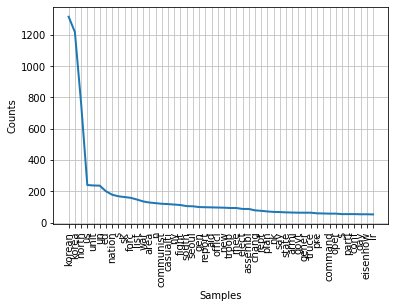

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
not_word = ['?','.','!','/',';',':',',','[',']','{','}',"'",'(',')','--','_']
saved_data1['stemmed_text'] = saved_data1['stemmed_text'].str.replace('nan','')
for word in not_word:
    saved_data1['stemmed_text'] = saved_data1['stemmed_text'].str.replace(word,'')
tokens = FreqDist(sum(saved_data1['stemmed_text'].map(word_tokenize), []))
tokens.plot(50)

/var/folders/2j/sh023cfx5kd0tgwfn0nptbrc0000gn/T/ipykernel_2468/369577630.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  saved_data2['stemmed_text'] = saved_data2['stemmed_text'].str.replace(word,'')


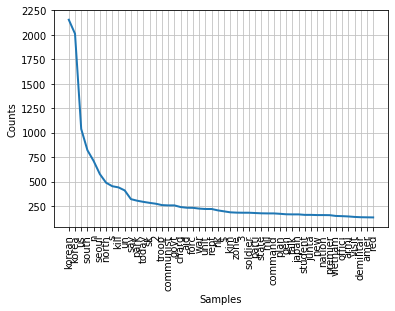

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
saved_data2['stemmed_text'] = saved_data2['stemmed_text'].str.replace('nan','')
for word in not_word:
    saved_data2['stemmed_text'] = saved_data2['stemmed_text'].str.replace(word,'')
tokens2 = FreqDist(sum(saved_data2['stemmed_text'].map(word_tokenize), []))
tokens2.plot(50)

/var/folders/2j/sh023cfx5kd0tgwfn0nptbrc0000gn/T/ipykernel_2468/3894932981.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  saved_data3['stemmed_text'] = saved_data3['stemmed_text'].str.replace(word,'')


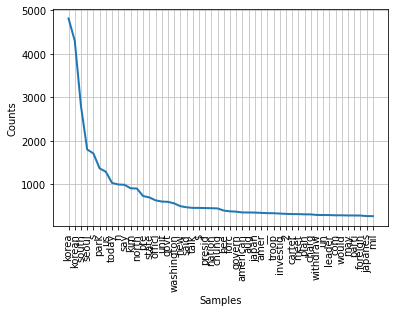

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
saved_data3['stemmed_text'] = saved_data3['stemmed_text'].str.replace('nan','')
for word in not_word:
    saved_data3['stemmed_text'] = saved_data3['stemmed_text'].str.replace(word,'')
tokens3 = FreqDist(sum(saved_data3['stemmed_text'].map(word_tokenize), []))
tokens3.plot(50)

/var/folders/2j/sh023cfx5kd0tgwfn0nptbrc0000gn/T/ipykernel_2468/3070977052.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  saved_data4['stemmed_text'] = saved_data4['stemmed_text'].str.replace(word,'')


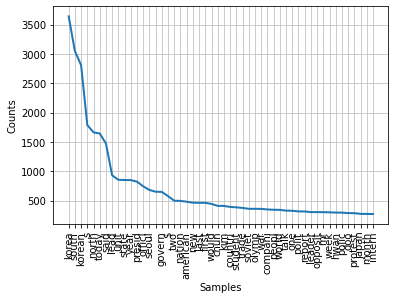

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
saved_data4['stemmed_text'] = saved_data4['stemmed_text'].str.replace('nan','')
for word in not_word:
    saved_data4['stemmed_text'] = saved_data4['stemmed_text'].str.replace(word,'')
tokens4 = FreqDist(sum(saved_data4['stemmed_text'].map(word_tokenize), []))
tokens4.plot(50)